# Line plot with multifacets

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

nuqta = sns.load_dataset("dots")
nuqta.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


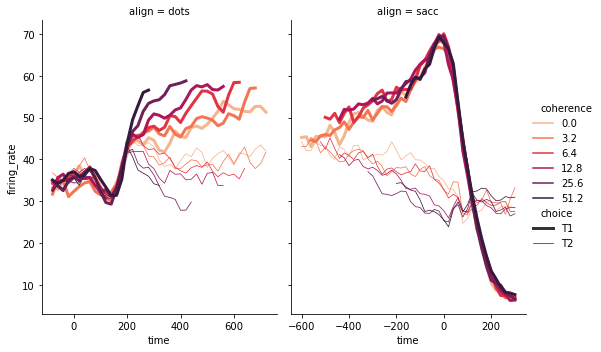

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

nuqta = sns.load_dataset("dots")

# Defining a color palette
pelette = sns.color_palette('rocket_r')  # 'rocket_r' is a color pallete

# Plot lineplot

sns.relplot(data=nuqta, x="time", y="firing_rate", hue="coherence",
            size="choice",
           col="align",
           kind="line", size_order=["T1", "T2"],
           palette= pelette,
           height=5,
           aspect=0.75,
           facet_kws=dict(sharex=False))



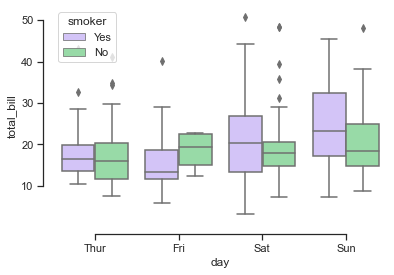

In [12]:
import seaborn as sns
sns.set_theme(style="ticks",palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill", hue="smoker", palette=["m" , "g"],
           data=tips)
sns.despine(offset=10, trim=True)


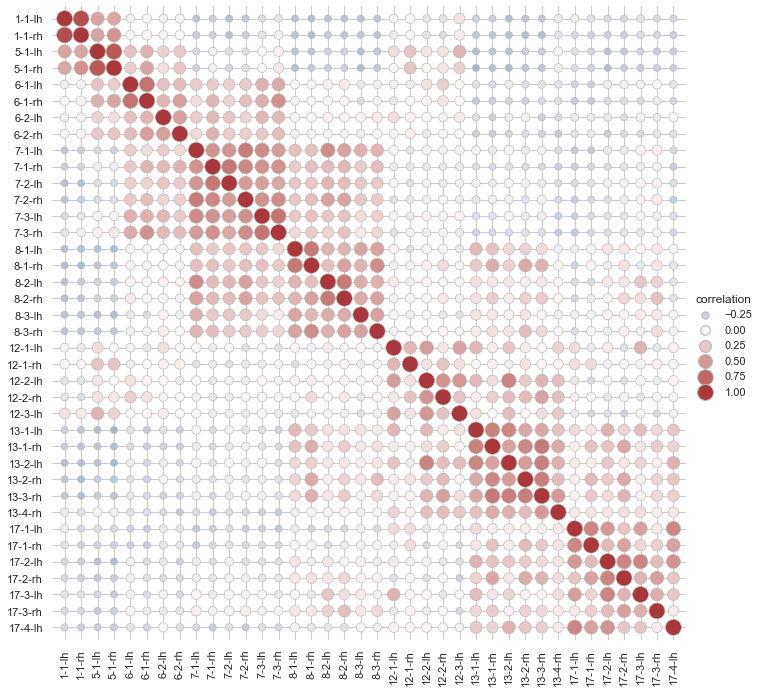

In [13]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

<AxesSubplot:xlabel='clarity', ylabel='carat'>

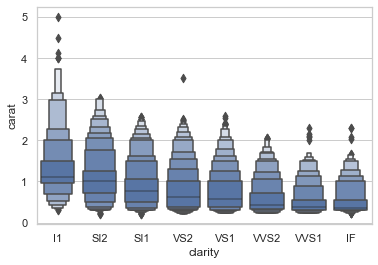

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="clarity", y="carat",
              color="b", order=clarity_ranking,
              scale="linear", data=diamonds)

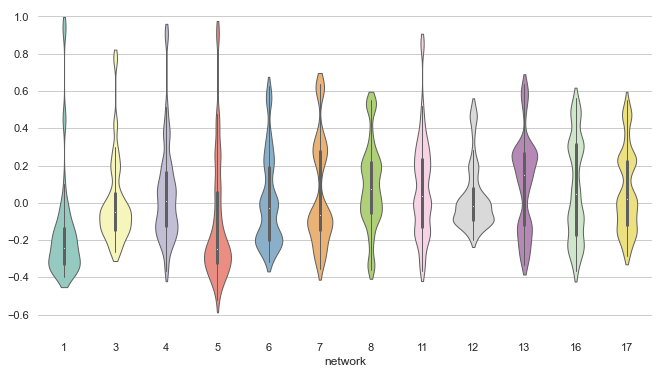

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

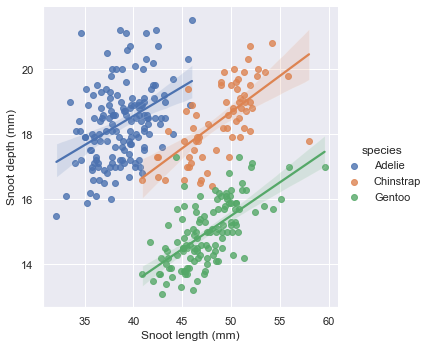

In [16]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

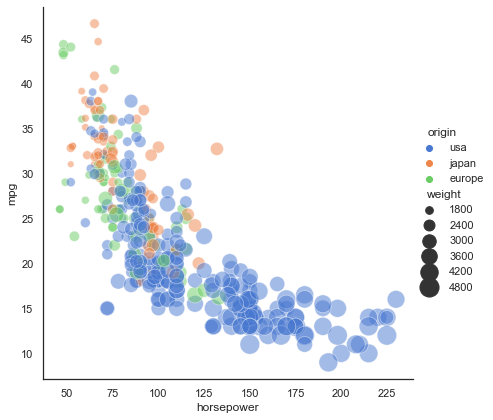

In [24]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

nuqta = sns.load_dataset("dots")
nuqta.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [26]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='choice', ylabel='coherence'>

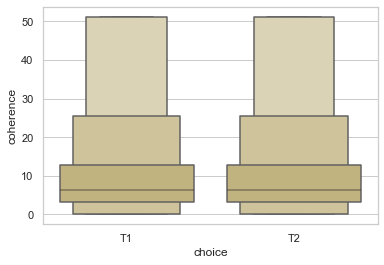

In [30]:
import seaborn as sns
sns.set_theme(style="whitegrid")

nuqta = sns.load_dataset("dots")
# clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="choice", y="coherence",
              color="y",
              scale="linear", data=nuqta)

In [31]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


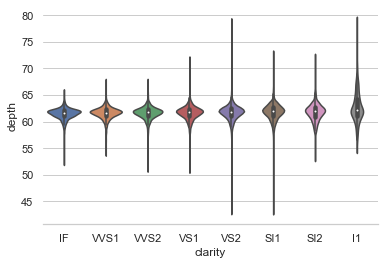

In [46]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
diamonds = sns.load_dataset("diamonds")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=diamonds, x="clarity", y="depth")
               
sns.despine(left=True)